In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from BinaryFileUnpack import BinaryFileUnpack
import warnings

In [2]:
# Fitting damping model to data
def damping(t, A, gamma, omega, phi, c, d):
    warnings.filterwarnings('ignore')
    return A * np.exp(-gamma*t) * np.cos(omega*t - phi) + c*np.exp(-d*t)

# Identifying and obtaining parameters for periodic motion based off damping function
def periodic_range(func, time, ydata, fs:int, pos_omega, time_range=8, sens_ind=2):
    std_dev = []
    params = []
    max_ind = np.argmax(ydata[sens_ind])
    start = time[max_ind]
    done = False
    while not done:
        end = start + time_range
        if end > time[-1] or start < time[0]:
            break
        
        s = int(start*fs)
        e = int(end*fs)
        
        try:
            popt, pcov = curve_fit(func, time[0:e-s], ydata[sens_ind, s:e])
        except RuntimeError:
            start -= 0.025
        else:
            std_dev = np.sqrt(np.diag(pcov))
            params = popt
            done = True

    return params, std_dev, start, end

## Test of methods
# res = 1
# if fs > 1000:
#     res *= int(fs//1000)
# print(analysis.time[::res].shape, analysis.P[:, ::res].shape)

# popt, std_dev, start, end = periodic_range(damping, analysis.time[::res], analysis.P[:, ::res], 1000, 2)

# print(f"Duration: {start} to {end}\nomega = {popt[2]}\nstd_dev = {std_dev[2]}")

# s = int(start*fs)
# e = int((start+8) * fs)
# plt.plot(analysis.time[:e-s], analysis.P[2, s:e])
# plt.plot(analysis.time[:e-s], damping(analysis.time[0:e-s], *popt))

For X48cm, Y10in:
	Duration: 5.089 to 13.089
	omega = 3.3948992692390614
	std_dev = 0.0022640504131122715


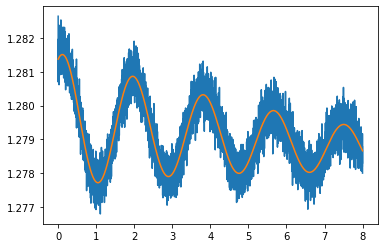

For X48cm, Y15in:
	Duration: 32.606 to 40.606
	omega = 2.9725517995147235
	std_dev = 0.0009263068579430519


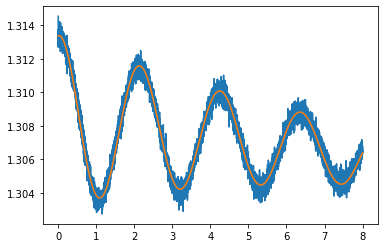

For X48cm, Y21in:
	Duration: 12.94 to 20.939999999999998
	omega = -3.001581320541597
	std_dev = 0.004205703892492654


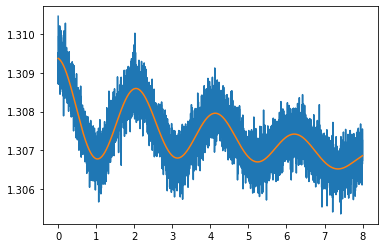

For X48cm, Y25in:
	Duration: 3.719 to 11.719
	omega = 2.8062052984921015
	std_dev = 0.0012475177706760688


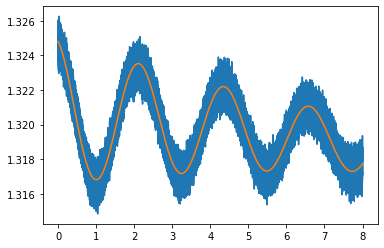

For X48cm, Y32in:
	Duration: 3.086 to 11.086
	omega = 2.6839593318330817
	std_dev = 0.0021494577613434722


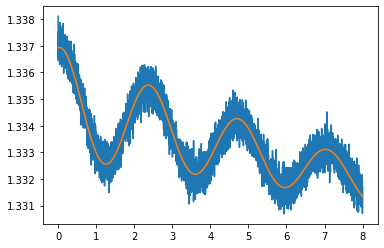

For X48cm, Y6in:
	Duration: 18.893 to 26.893
	omega = 3.4994627533749534
	std_dev = 0.0017425822025002669


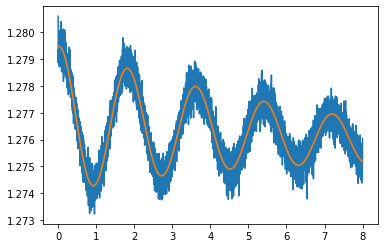

For X60cm, Y17in:
	Duration: 3.339 to 11.339
	omega = -3.2885964067001012
	std_dev = 0.0037131713977615146


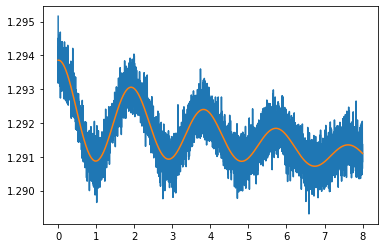

For X60cm, Y23in:
	Duration: 7.484 to 15.484
	omega = 3.0625660497201572
	std_dev = 0.003330340827943507


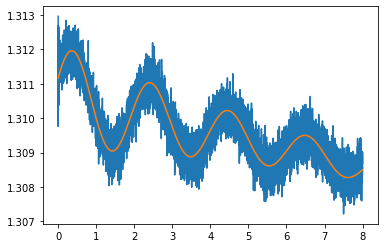

For X60cm, Y27in:
	Duration: 5.118 to 13.118
	omega = -2.8166348832414285
	std_dev = 0.0012138273397125786


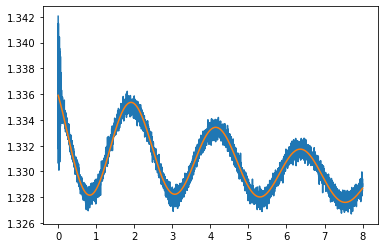

For X60cm, Y27in:
	Duration: 4.03 to 12.030000000000001
	omega = 2.861547032177688
	std_dev = 0.0009314873880537887


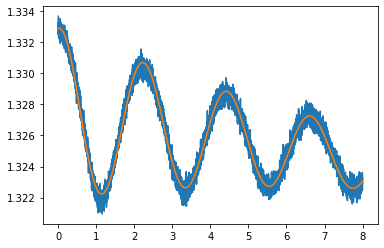

For X60cm, Y30in:
	Duration: 4.276 to 12.276
	omega = 2.8472792461284677
	std_dev = 0.002737304132452713


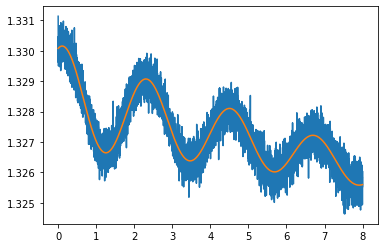

For X60cm, Y4in:
	Duration: 3.4410000000000003 to 11.441
	omega = 3.7348512621593177
	std_dev = 0.0010358591100822375


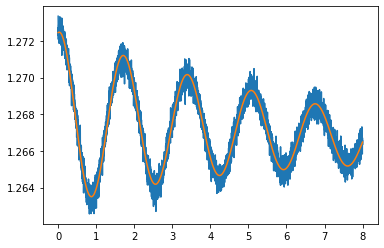

For X60cm, Y7in:
	Duration: 20.231 to 28.231
	omega = 3.6237855755414126
	std_dev = 0.0023815138863167535


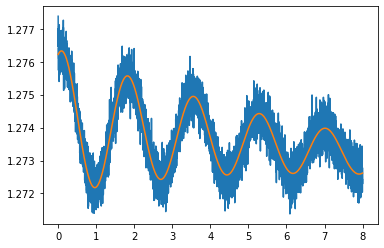

For X70cm, Y10in:
	Duration: 1.953 to 9.953
	omega = 3.8705754620015176
	std_dev = 0.002850757427105462


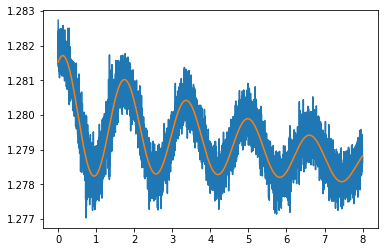

For X70cm, Y15in:
	Duration: 2.7760000000000002 to 10.776
	omega = 3.556465254233446
	std_dev = 0.0017188964152544252


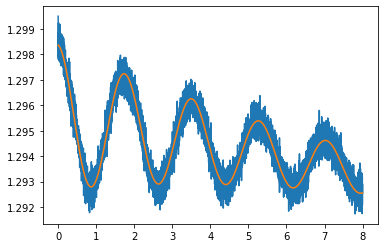

For X70cm, Y23in:
	Duration: 22.577 to 30.577
	omega = -3.270272613942744
	std_dev = 0.001962844609285825


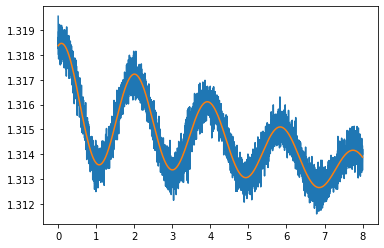

For X70cm, Y31in:
	Duration: 3.5740000000000003 to 11.574
	omega = 3.070546088507796
	std_dev = 0.0023675206046326223


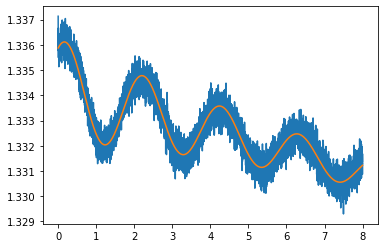

For X70cm, Y5in:
	Duration: 58.696 to 66.696
	omega = 4.112946111667195
	std_dev = 0.0022853369661382443


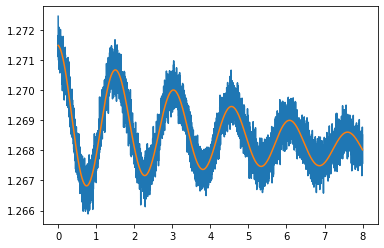

In [3]:
import os

# Keep track of the home directory
parent_dir = "C:\\Users\\akyap\\OneDrive\\Documents\\Academics\\Research\\LDEO Geysers\\files\\07-13\\frequency-tests"
os.chdir(parent_dir)

# Name of directory that holds data
# os.chdir()

# Get all the subdirectories in the directory
dirs_raw = filter(lambda file: '.' not in file, os.listdir())

# Directory names must be in the format: "X{number}{'cm' or 'in'}"
dirs = []
for dir in dirs_raw:
    if dir[0] == 'X' and dir[1:-2].isnumeric():
        unit = dir[-2:] 
        if unit == 'cm' or unit == 'in':
            dirs.append(dir)

# List that stores all the test data, seperated by commas (,), to be dumped into .csv
# Header information for data string.
test_summary = ['X,Y,start,end,A,damp_factor,omega,phi,c,d,stdev-A,stdev-damp,stdev-omega,stdev-phi,stdev-c,stdev-d']

verbose = True  # True if verobose output and graphs is needed
savefig = False  # True if plot is to be saved
for dir in dirs:
    os.chdir(dir)
    for file in os.listdir():
        try: name, ext = file.split('.')
        except ValueError: pass  # Not a file
        else: 
            if ext == 'bin':  # Analyze .bin files
                # File format is 'DAQ_{dir}_Y{y_value}-{date}-{time}.bin'
                # Use str.split accordingly to get y_value
                y_value = name.split('-')[0].split('_')[-1][1:]
                
                if verbose: print(f"For {dir}, Y{y_value}:")
                
                # Get file details with BinaryFileUnpack class
                obj = BinaryFileUnpack(file)
                fs = int(obj.fs)
                # Force data at 1 kHz for analysis
                res = 1
                if fs > 1000:
                    res *= int(fs//1000)
                
                # Look at data for sensor 3
                sens_ind = 2
                popt, std_dev, start, end = periodic_range(damping, obj.time[::res], obj.P[:, ::res], 1000, 2, sens_ind=sens_ind)
                
                # Getting data string for the csv file
                data_string = f"{dir[1:]},{y_value},{start},{end},{','.join([str(param) for param in popt])},{','.join([str(sd) for sd in std_dev])}"
                test_summary.append(data_string)

                s = int(start*fs)
                e = int(end * fs)
                plt.plot(obj.time[:e-s], obj.P[2, s:e])
                plt.plot(obj.time[:e-s], damping(obj.time[:e-s], *popt))

                if verbose: 
                    print(f"\tDuration: {start} to {end}\n\tomega = {popt[2]}\n\tstd_dev = {std_dev[2]}")
                    plt.show()

                if savefig: plt.savefig(f"{dir}_Y{y_value}.png")
                
    os.chdir('../')

os.chdir(parent_dir)

In [4]:
# Writing to .csv file
with open('cold-water-freq.csv', 'w') as file_write:
    for test in test_summary:
        file_write.write(test + '\n')